In [155]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers

In [156]:
Image_size = 256
Batch_size = 32
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle = True,
    image_size=(Image_size, Image_size),
    batch_size=Batch_size
)

Found 2152 files belonging to 3 classes.


In [157]:
class_names = datasets.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [158]:
len(datasets)

68

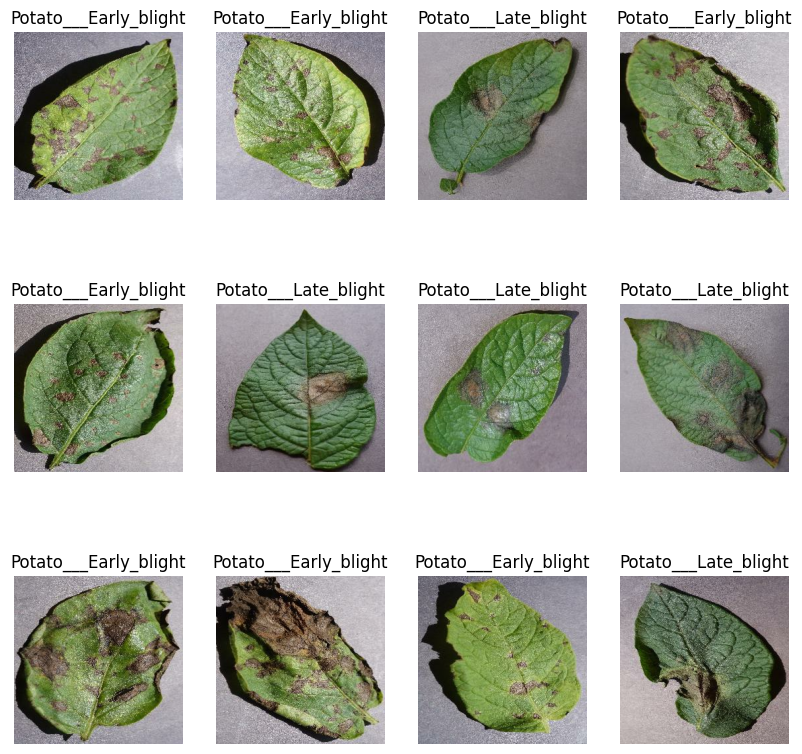

In [159]:
# data visualisation
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in datasets.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [160]:
EPOCHS = 50
train_size = 0.8
len(datasets)*train_size

54.400000000000006

In [161]:
training_dataset = datasets.take(54)
len(training_dataset)

54

In [162]:
test_dataset = datasets.skip(54)
len(test_dataset)

14

In [163]:
val_dataset_size = 0.1
len(datasets)*val_dataset_size

6.800000000000001

In [164]:
val_dataset = test_dataset.take(6)
test_dataset = test_dataset.skip(6)

In [165]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [166]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(datasets)

In [167]:
len(train_ds)

54

In [168]:
len(val_ds)

6

Cache,Shuffle and prefetch the dataset


In [169]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Creating a Layer for Resizing and Normalization.Normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256) to make the model training faster and more stable.Useful when the model is used for prediction. At that time someone can supply an image that is not (256,256) and this layer will resize it

In [170]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(Image_size, Image_size),
  layers.Rescaling(1./255),
])

Data Augmentation(add more images using geometric transformations) 

In [171]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])